# Goal

Simple example of concentration-response fitting using the [R/tcpl](https://cran.r-project.org/web/packages/tcpl/index.html) package in Python3 using rpy2. This assumes you've successfully installed [rpy2](https://pypi.org/project/rpy2/) and then set your environment variables below ... 

Read about the tcplFit approach in [The ToxCast Analysis Pipeline : An R Package for Processing and Modeling Chemical Screening Data](https://academic.oup.com/bioinformatics/article/33/4/618/2617576)


The wrapper is in src/tcpl/fit/tcplfit.py 

In [60]:
import os,sys
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv())

os.environ['PYTHONPATH']=os.environ.get('LIB')
if not os.environ.get('LIB') in sys.path: 
    sys.path.insert(0,os.environ.get('LIB'))

INP_DIR = os.environ.get('DAT_DIR')    
FIG_DIR = os.environ.get('FIG_DIR')

%load_ext autoreload
%autoreload 2
%pylab inline
%load_ext rpy2.ipython

import matplotlib.text as text
import pandas as pd
import numpy as np
import pylab as pl
import scipy as sp
import sys
import rpy2 
import os 
from matplotlib import gridspec
from scipy.interpolate import splev, splrep
import seaborn as sns
from scipy import stats
import rpy2.robjects.packages as rpackages
import seaborn as sns
from statsmodels import robust
from box import Box


pd.set_option('display.max_colwidth', 500)




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [66]:
from tcpl.fit.tcplfit import *

# Concentration-response Data

Some example data

In [46]:
CR = pd.DataFrame(dict(lconc=[0,0.1,1,2,3,4,5], resp=[0,1,1,2,3,10,12]))
CR

,lconc,resp
0,0.0,0
1,0.1,1
2,1.0,1
3,2.0,2
4,3.0,3
5,4.0,10
6,5.0,12


# How would do I fit these  R using tcplFit?

Send the data to R

In [47]:
%Rpush CR

Run tcplFit

In [65]:
%%R

library(tcpl)
RFit <- tcplFit(CR$lconc,CR$resp,bmad=1)

Get the data 

In [53]:
%Rpull RFit

In [56]:
as_dict(RFit)

{'resp_max': 12,
 'resp_min': 0,
 'max_mean': 12.0,
 'max_mean_conc': 5.0,
 'max_med': 12,
 'max_med_conc': 5.0,
 'logc_max': 5.0,
 'logc_min': 0.0,
 'cnst': 1,
 'hill': 1,
 'hcov': 1,
 'gnls': 1,
 'gcov': 1,
 'cnst_er': 1.4757908737625607,
 'cnst_aic': 46.802601395485986,
 'cnst_rmse': 6.082762530298219,
 'hill_tp': 12.39424905348433,
 'hill_tp_sd': 0.8223938246377923,
 'hill_ga': 3.4347950609703233,
 'hill_ga_sd': 0.11160520288642674,
 'hill_gw': 1.0295513170222423,
 'hill_gw_sd': 0.27255421047969597,
 'hill_er': -0.4387183022119415,
 'hill_er_sd': 0.37709533452770433,
 'hill_aic': 25.11681825380402,
 'hill_rmse': 0.8092860083417533,
 'gnls_tp': 14.399999998823773,
 'gnls_ga': 3.4704932660407493,
 'gnls_gw': 0.5857035513400808,
 'gnls_la': 5.6881904369511505,
 'gnls_lw': 1.7357265926694323,
 'gnls_er': -0.5518176792159025,
 'gnls_aic': 28.697193314287695,
 'gnls_rmse': 0.8563767332398319,
 'nconc': 7,
 'npts': 7,
 'nrep': 1.0,
 'nmed_gtbl': 3,
 'logc': [0.0, 0.1, 1.0, 2.0, 3.0, 4.0, 

In [54]:
# %%R

# library(tcpl)
# Conc = c(0,0.1,1,2,3,4,5)
# Resp = c(0,1,1,2,3,10,12)
# Fit <- tcplFit(Conc,Resp,bmad=1)
# names(Fit)


# How do I do this in Py3?

If you were doing this from scratch

In [14]:
rtcpl = rpackages.importr('tcpl')

In [24]:
import rpy2
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri,FloatVector,ListVector

rtcpl.tcplFit(FloatVector(CR.lconc),FloatVector(CR.resp),bmad=1)

R object with classes: ('list',) mapped to:
[FloatSexp..., FloatSexp..., FloatSexp..., FloatSexp..., ..., IntSexpVe..., FloatSexp..., FloatSexp..., FloatSexp...]
  resp_max: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
[12.000000]
  resp_min: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
[0.000000]
  max_mean: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
[12.000000]
  max_mean_conc: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
[5.000000]
...
  max_med_conc: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('RTYPES.INTSXP',) mapped to:
[3]
  logc_max: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
[0.000000, 0.100000, 1.000000, 2.000000, 3.000000, 4.000000, 5.000000]
  logc_min: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
[0.003604, 0.004568, 0.038470, 0.399749, 3.258957, 9.822097, 12.098268]
  cnst: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
[0.132334, 0.151240, 0.496752, 1.742154, 4.989288, 9.655507, 12.008756]

## Here's how it's all wrapped up in Python

In [67]:
from tcpl.fit.tcplfit import *

In [58]:
F = tcplFit(CR.lconc,CR.resp,bmad=1)

In [68]:
from box import Box
F = Box(F)
F.keys()

dict_keys(['fits', 'cr_info', 'cr_data', 'best_fit'])

In [69]:
F.best_fit

<Box: {'er': -0.4387183022119415, 'aic': 25.11681825380402, 'rmse': 0.8092860083417533, 'model': 'hill', 'tp': 12.39424905348433, 'tp_sd': 0.8223938246377923, 'ga': 3.4347950609703233, 'ga_sd': 0.11160520288642674, 'gw': 1.0295513170222423, 'gw_sd': 0.27255421047969597, 'er_sd': 0.37709533452770433, 'modl': [0.003604094204999431, 0.004567909412089644, 0.03847013118866646, 0.39974866154004457, 3.2589568800741726, 9.822096573082447, 12.098267678871872], 'la': nan, 'lw': nan}>

In [35]:
F.best_fit.model

'hill'

## Here are the fits...

In [41]:
pd.DataFrame(F.fits)

,er,aic,rmse,model,tp,tp_sd,ga,ga_sd,gw,gw_sd,er_sd,modl,la,lw
0,1.475791,46.802601,6.082763,cnst,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.438718,25.116818,0.809286,hill,12.394249,0.822394,3.434795,0.111605,1.029551,0.272554,0.377095,"[0.003604094204999431, 0.004567909412089644, 0.03847013118866646, 0.39974866154004457, 3.2589568800741726, 9.822096573082447, 12.098267678871872]",NaN,NaN
2,-0.551818,28.697193,0.856377,gnls,14.400000,NaN,3.470493,NaN,0.585704,NaN,NaN,"[0.1323343814035458, 0.15124018158256536, 0.4967519585496057, 1.7421537922135253, 4.989287938630292, 9.655506565188455, 12.00875552845312]",5.68819,1.735727


## Here's how to plot the fit

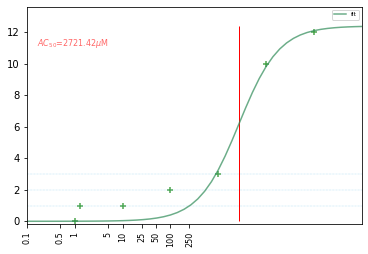

In [73]:
tcplPlot(F)